# PCA

In [267]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_csv("C:/Users/Mary/Desktop/Диплом/final_df.csv")

In [12]:
df = df.drop(df.columns[0], axis=1)

In [14]:
df.head(2)

,Quadrant,0,1,2,3,4,5,6,7,8,...,497,498,499,500,501,502,503,504,505,506
0,Q3,0.344369,0.267671,0.231999,0.226553,0.236617,0.256444,0.282879,0.309561,0.325702,...,-0.020307,2.324166,3.567792,3.883560,-1.823020,-2.058319,-5.530811,-2.079775,-2.063657,163.043478
1,Q2,0.413149,0.422476,0.382707,0.338075,0.339839,0.332445,0.323744,0.324923,0.316282,...,-1.688632,-3.825361,-0.613288,-3.535904,-4.854705,-1.428813,-8.155371,0.105861,-4.854570,135.999178


In [18]:
X = df.drop('Quadrant',axis=1)
y = df['Quadrant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Визуализация для двух компонент

In [188]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [277]:
pca = PCA(n_components=2) 

In [279]:
X_pca = pca.fit_transform(X_scaled)

In [190]:
pca = PCA(n_components=2)  

In [192]:
X_pca = pca.fit_transform(X_scaled)

In [194]:
encoder = LabelEncoder() 
y_train_encoded = encoder.fit_transform(y)

In [283]:
print(pca.explained_variance_ratio_)
print(f'Объясненная дисперсия для первых 2 компонентов: {sum(pca.explained_variance_ratio_)}')

[0.25200014 0.10019003]
Объясненная дисперсия для первых 2 компонентов: 0.35219017206195824


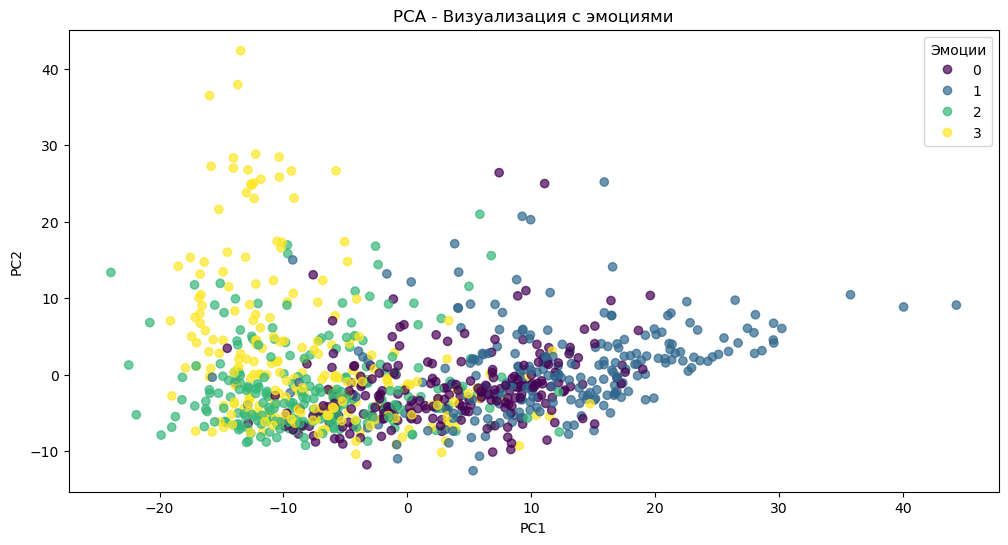

In [200]:
# Предположим, что у вас есть метки классов (например, эмоции)
labels = y_train_encoded 

plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title("PCA - Визуализация с эмоциями")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(*scatter.legend_elements(), title="Эмоции")
plt.show()

# Визуализация для трех компонент

In [249]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [251]:
pca = PCA(n_components=3)  

In [253]:
X_pca = pca.fit_transform(X_scaled)

In [255]:
encoder = LabelEncoder() 
y_train_encoded = encoder.fit_transform(y)

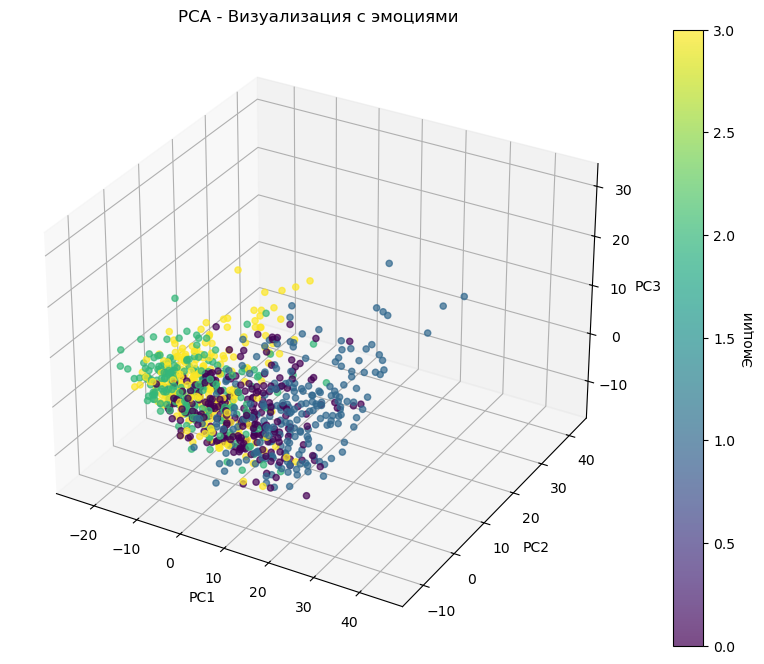

In [263]:
X_pca_3d = pca.transform(X_scaled)[:, :3] 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализируем данные в 3D, используя цветовую кодировку по меткам (эмоции)
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='viridis', alpha=0.7)

# Названия осей
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.colorbar(scatter, ax=ax, label="Эмоции")
plt.title("PCA - Визуализация с эмоциями")
plt.show()

# Проверка оптимального количества компонент

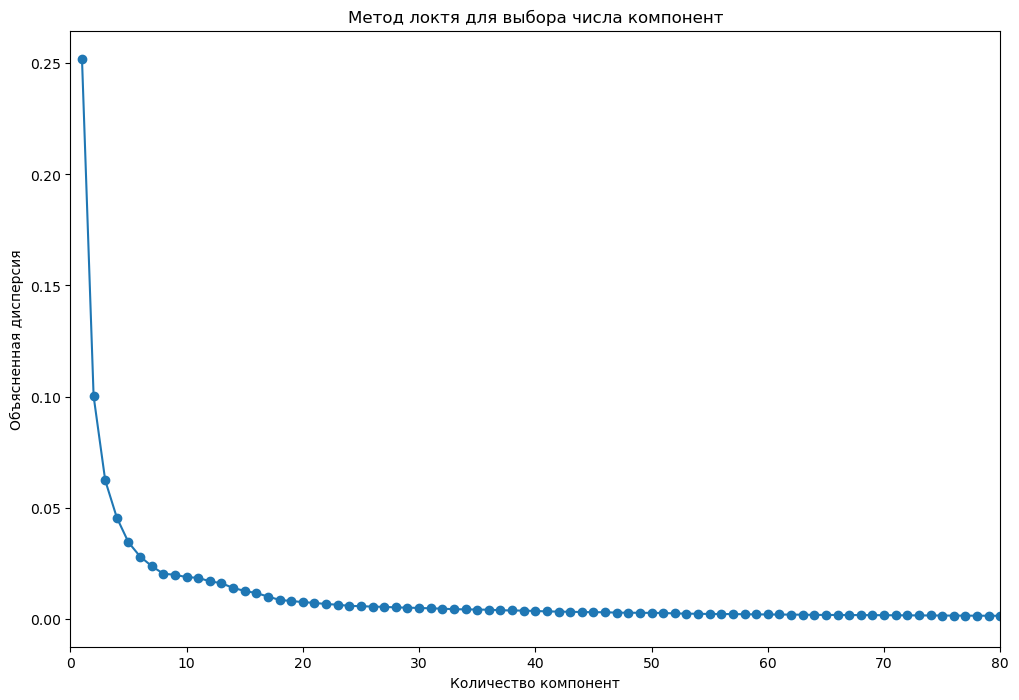

In [214]:
# Применяем PCA и получаем объясненную дисперсию
pca = PCA()
pca.fit(X_scaled)

# Получаем объясненную дисперсию для каждого компонента
explained_variance = pca.explained_variance_ratio_

# Строим график "локтя"
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Объясненная дисперсия')
plt.xlim(0,80)
plt.title('Метод локтя для выбора числа компонент')
plt.show()

# Построение модели с лучшим количеством компонент

In [116]:
pca = PCA(n_components=25)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [104]:
# Выведем объясненную дисперсию
print(pca.explained_variance_ratio_)
print(f'Объясненная дисперсия для первых 5 компонентов: {sum(pca.explained_variance_ratio_)}')

[0.24995664 0.10066849 0.06327792 0.04713027 0.03481408 0.02804524
 0.02337446 0.020686   0.01922757 0.01862705 0.0179955  0.01636979
 0.01586145 0.0144438  0.01236104 0.01156604 0.01010635 0.00860556
 0.00814017 0.00754121 0.00707178 0.00672372 0.00647319 0.00586668
 0.00561161 0.00544747 0.0053586  0.00516394 0.00496695 0.0048837
 0.00467769 0.0044175  0.00427759 0.00419173]
Объясненная дисперсия для первых 5 компонентов: 0.8039307746998543


In [128]:
# Оптимизируем гиперпараметры
def objective(trial):
    # Подбираемые параметры
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Количество деревьев
    max_depth = trial.suggest_int("max_depth", 2, 50)  # Глубина деревьев
    min_samples_split = trial.suggest_float("min_samples_split", 0.01, 0.5)  # Мин. число объектов для разбиения
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)  # Мин. число объектов в листе
    max_features = trial.suggest_float("max_features", 0.1, 1.0)  # Доля признаков для построения каждого дерева
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])  # Использовать бутстрап?

    # Определяем модель
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1  # Параллельный запуск
    )

    # Кросс-валидация (StratifiedKFold для лучшего баланса классов)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_pca, y_train, cv=skf, scoring="accuracy", n_jobs=-1).mean()
    
    return score  # Оптимизируем точность

# Запускаем Optuna с Pruner (отбрасывание слабых комбинаций)
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, n_jobs=-1)  # Больше итераций

# Вывод лучших параметров
print("Лучшие параметры:", study.best_params)
print("Лучший результат:", study.best_value)


[I 2025-04-22 17:03:04,772] A new study created in memory with name: no-name-3c358ee0-00a3-4cdc-a9a7-b5cb4689e5b2
[I 2025-04-22 17:03:12,574] Trial 3 finished with value: 0.542483660130719 and parameters: {'n_estimators': 175, 'max_depth': 40, 'min_samples_split': 0.27462594016171027, 'min_samples_leaf': 18, 'max_features': 0.18385814481909693, 'bootstrap': False}. Best is trial 3 with value: 0.542483660130719.
[I 2025-04-22 17:03:12,730] Trial 2 finished with value: 0.5385620915032681 and parameters: {'n_estimators': 191, 'max_depth': 48, 'min_samples_split': 0.20591454432630238, 'min_samples_leaf': 4, 'max_features': 0.4314174018701251, 'bootstrap': False}. Best is trial 3 with value: 0.542483660130719.
[I 2025-04-22 17:03:14,292] Trial 7 finished with value: 0.5359477124183007 and parameters: {'n_estimators': 218, 'max_depth': 15, 'min_samples_split': 0.13467739739750204, 'min_samples_leaf': 14, 'max_features': 0.8055317812363567, 'bootstrap': False}. Best is trial 3 with value: 0.5

Лучшие параметры: {'n_estimators': 245, 'max_depth': 29, 'min_samples_split': 0.011549548303337136, 'min_samples_leaf': 4, 'max_features': 0.5336281735905529, 'bootstrap': True}
Лучший результат: 0.5921568627450979


In [130]:
# Кодируем целевую переменную
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [136]:
# Обучаем модель
model = RandomForestClassifier(n_estimators=245, max_depth=29, min_samples_split=0.011549548303337136, min_samples_leaf=4, max_features=0.5336281735905529, bootstrap=True)
model.fit(X_train_pca, y_train_encoded)

# Оценка качества модели
y_pred = model.predict(X_test_pca)
#print(f'Точность модели: {accuracy_score(y_test_encoded, y_pred)}')
print(classification_report(y_test_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.51      0.58        41
           1       0.70      0.78      0.74        40
           2       0.52      0.57      0.54        28
           3       0.57      0.62      0.59        26

    accuracy                           0.62       135
   macro avg       0.61      0.62      0.61       135
weighted avg       0.63      0.62      0.62       135



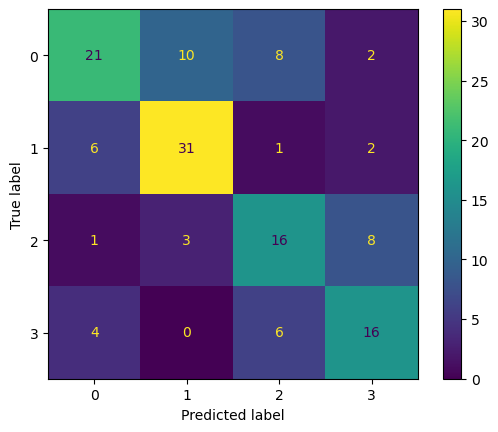

In [138]:
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded, y_pred)).plot()

In [144]:
# Преобразуем метки в числовые значения
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Оптимизируем гиперпараметры
def objective(trial):
    # Подбираемые параметры для XGBoost
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Количество деревьев
    max_depth = trial.suggest_int("max_depth", 2, 50)  # Глубина деревьев
    learning_rate = trial.suggest_float("learning_rate", 0.001, 0.1)  # Скорость обучения
    gamma = trial.suggest_float("gamma", 0, 1)  # Параметр, влияющий на регуляризацию
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)  # Мин. вес объекта для узла
    subsample = trial.suggest_float("subsample", 0.5, 1.0)  # Доля выборки для обучения
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)  # Доля признаков для каждого дерева

    # Определяем модель
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42,
        n_jobs=-1  # Параллельный запуск
    )

    # Кросс-валидация (StratifiedKFold для лучшего баланса классов)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_pca, y_train_encoded, cv=skf, scoring="accuracy", n_jobs=-1).mean()
    
    return score  # Оптимизируем точность

# Запускаем Optuna с Pruner (отбрасывание слабых комбинаций)
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, n_jobs=-1)  # Больше итераций

# Вывод лучших параметров
print("Лучшие параметры:", study.best_params)
print("Лучший результат:", study.best_value)


[I 2025-04-22 17:22:00,962] A new study created in memory with name: no-name-27437c1e-d5f3-4c9b-ac5b-9a2ef6339e92
[I 2025-04-22 17:22:15,351] Trial 1 finished with value: 0.5620915032679739 and parameters: {'n_estimators': 167, 'max_depth': 49, 'learning_rate': 0.06702373239374497, 'gamma': 0.6457860685468849, 'min_child_weight': 5, 'subsample': 0.7167217790705472, 'colsample_bytree': 0.6141977997029585}. Best is trial 1 with value: 0.5620915032679739.
[I 2025-04-22 17:22:16,494] Trial 4 finished with value: 0.5647058823529412 and parameters: {'n_estimators': 240, 'max_depth': 22, 'learning_rate': 0.027230926802700596, 'gamma': 0.9779591626360167, 'min_child_weight': 2, 'subsample': 0.7621418757508347, 'colsample_bytree': 0.8580784561814365}. Best is trial 4 with value: 0.5647058823529412.
[I 2025-04-22 17:22:17,733] Trial 2 finished with value: 0.5673202614379085 and parameters: {'n_estimators': 103, 'max_depth': 27, 'learning_rate': 0.023764409642505174, 'gamma': 0.10696343115937046,

Лучшие параметры: {'n_estimators': 290, 'max_depth': 36, 'learning_rate': 0.02308759880059512, 'gamma': 0.1874798240343146, 'min_child_weight': 4, 'subsample': 0.6439348270799962, 'colsample_bytree': 0.6538705141878969}
Лучший результат: 0.5764705882352942


In [148]:
# Преобразуем метки в числовые значения
encoder = LabelEncoder()

# Преобразуем y_train и y_test
y_train_encoded = encoder.fit_transform(y_train)  # Кодируем метки для тренировки
y_test_encoded = encoder.transform(y_test)  # Кодируем метки для теста

optuna_xgb = XGBClassifier(n_estimators=290, max_depth=36, learning_rate=0.02308759880059512, gamma=0.1874798240343146, min_child_weight=4, subsample=0.6439348270799962, colsample_bytree=0.6538705141878969)
optuna_xgb.fit(X_train_pca,y_train_encoded)
optuna_xgb_preds = optuna_xgb.predict(X_test_pca)

In [150]:
print(classification_report(y_test_encoded,optuna_xgb_preds))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62        41
           1       0.71      0.80      0.75        40
           2       0.60      0.54      0.57        28
           3       0.53      0.65      0.59        26

    accuracy                           0.64       135
   macro avg       0.63      0.64      0.63       135
weighted avg       0.65      0.64      0.64       135



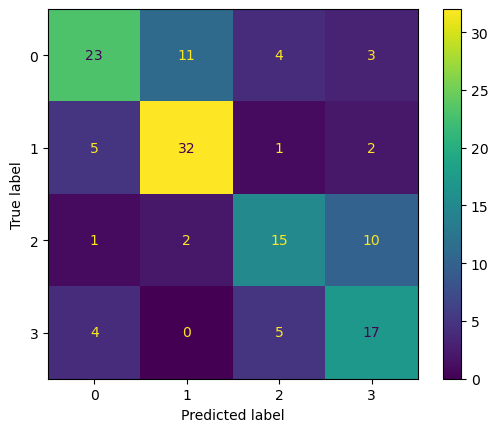

In [152]:
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded, optuna_xgb_preds)).plot()